# Statistical Models for Time Series

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# config
repr_html.tbl_df <- function(obj, ..., rows = 6) repr:::repr_html.data.frame(obj, ..., rows = rows)
options(dplyr.summarise.inform = FALSE)



In [3]:
orders <- read_csv('data/Daily_Demand_Forecasting_Orders_Var.csv')


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  week = col_double(),
  `Day of the week` = col_double(),
  `Non-urgent order` = col_double(),
  `Urgent order` = col_double(),
  `Order type A` = col_double(),
  `Order type B` = col_double(),
  `Order type C` = col_double(),
  `Fiscal sector orders` = col_double(),
  `Orders from the traffic controller sector` = col_double(),
  `Banking orders (1)` = col_double(),
  `Banking orders (2)` = col_double(),
  `Banking orders (3)` = col_double(),
  `Target (Total orders)` = col_double()
)




In [4]:
orders

week,Day of the week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
5,4,193.534,109.639,58.378,142.382,102.687,274.000,28364,88404,91367,15003,303.447
5,5,196.555,108.395,76.763,96.478,131.709,0.000,37011,109931,50112,12957,304.950
5,6,192.116,121.106,107.568,121.152,103.180,18.678,27328,108072,56015,10690,331.900


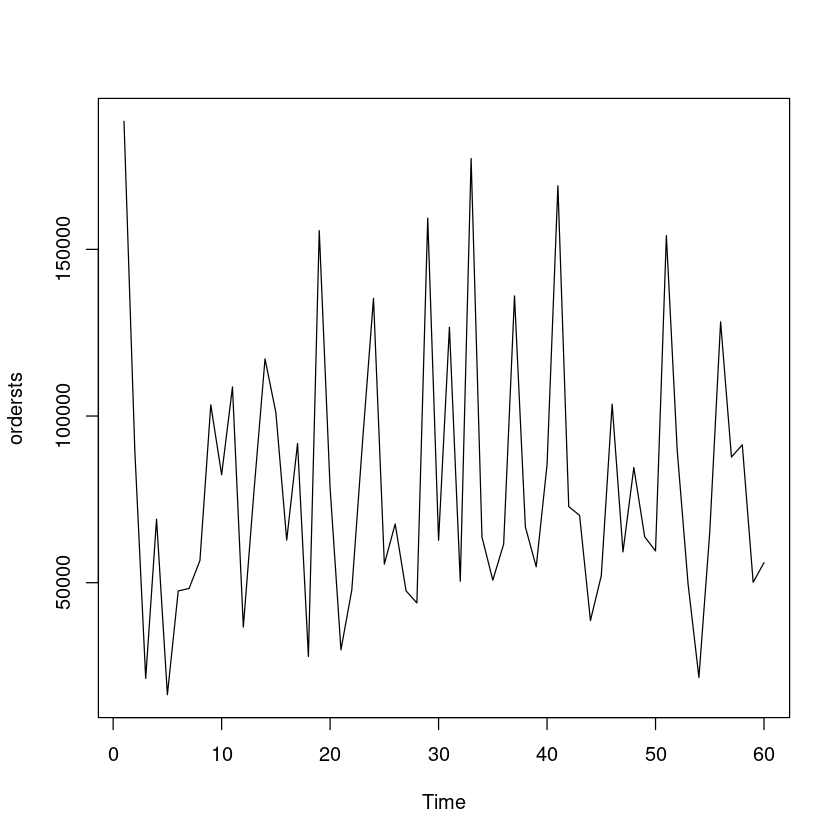

In [5]:
ordersts <- ts(orders$`Banking orders (2)`)
plot(ordersts)

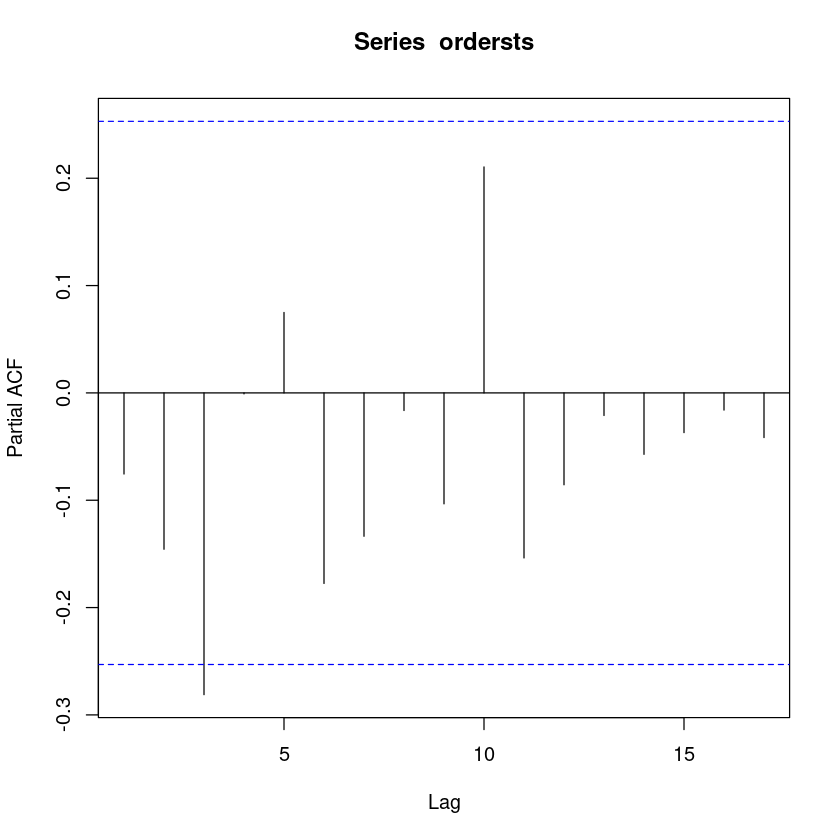

In [6]:
pacf(ordersts)

In [7]:
fit <- ar(ordersts, method = 'mle')

In [8]:
fit


Call:
ar(x = ordersts, method = "mle")

Coefficients:
      1        2        3  
-0.1360  -0.2014  -0.3175  

Order selected 3  sigma^2 estimated as  1.414e+09

If we look at the documentation for the ar() function, we can see that the order
selected is determined (with the default parameters we left undisturbed) based on the
Akaike information criterion (AIC). This is helpful to know because it shows that the
visual selection we made by examining the PACF is consistent with the selection that
would be made by minimizing an information criterion.

## Akaike Information Criterion
The AIC of a model is equal to $AIC = 2k – 2 log L$ where k is the number of parameters
of the model and L is the maximum likelihood value for that function. In general, we
want to lessen the complexity of the model (i.e., lessen k) while increasing the likeli‐
hood/goodness-of-fit of the model (i.e., L). So we will favor models with smaller AIC
values over those with greater AIC values.

Notice that the ar() function has also provided us with the coefficients for the model.
We may, however, want to limit the coefficients. For example, looking at the PACF,
we might wonder whether we really want to include a coefficient for the lag – 1 term
or whether we should assign that term a mandatory coefficient of 0 given that its
PACF value is well below the threshold used for significance. In this case, we can use
the arima() function also from the stats package.
Here, we demonstrate how to call the function to fit an AR(3), by setting the order
parameter to c(3, 0, 0) , where 3 refers to the order of the AR component

In [9]:
est <- arima(x = ordersts,
             order = c(3, 0, 0))
est


Call:
arima(x = ordersts, order = c(3, 0, 0))

Coefficients:
          ar1      ar2      ar3  intercept
      -0.1358  -0.2013  -0.3176  79075.350
s.e.   0.1299   0.1289   0.1296   2981.124

sigma^2 estimated as 1.414e+09:  log likelihood = -717.42,  aic = 1444.83

To inject prior knowledge or opinion into our model, we can constraint a coefficient
to be 0. For example, if we want to constrain the lag – 1 term to remain 0 in our
model, we use the following call:

In [10]:
est_1 <- arima(x = ordersts,
               order = c(3, 0, 0),
               fixed = c(0, NA, NA, NA))
est_1

Warning message in arima(x = ordersts, order = c(3, 0, 0), fixed = c(0, NA, NA, :
“some AR parameters were fixed: setting transform.pars = FALSE”



Call:
arima(x = ordersts, order = c(3, 0, 0), fixed = c(0, NA, NA, NA))

Coefficients:
      ar1      ar2      ar3  intercept
        0  -0.1831  -0.3031  79190.705
s.e.    0   0.1289   0.1298   3345.253

sigma^2 estimated as 1.44e+09:  log likelihood = -717.96,  aic = 1443.91

Setting a value in the vector passed to the fixed parameter of the arima function to 0
rather than NA will constraint that value to remain 0.

We now inspect our model performance on our training data to assess the goodness
of fit of our model to this data set. We can do this in two ways. First, we plot the ACF
of the residuals (that, is the errors) to see if there is a pattern of self-correlation that
our model does not cover.

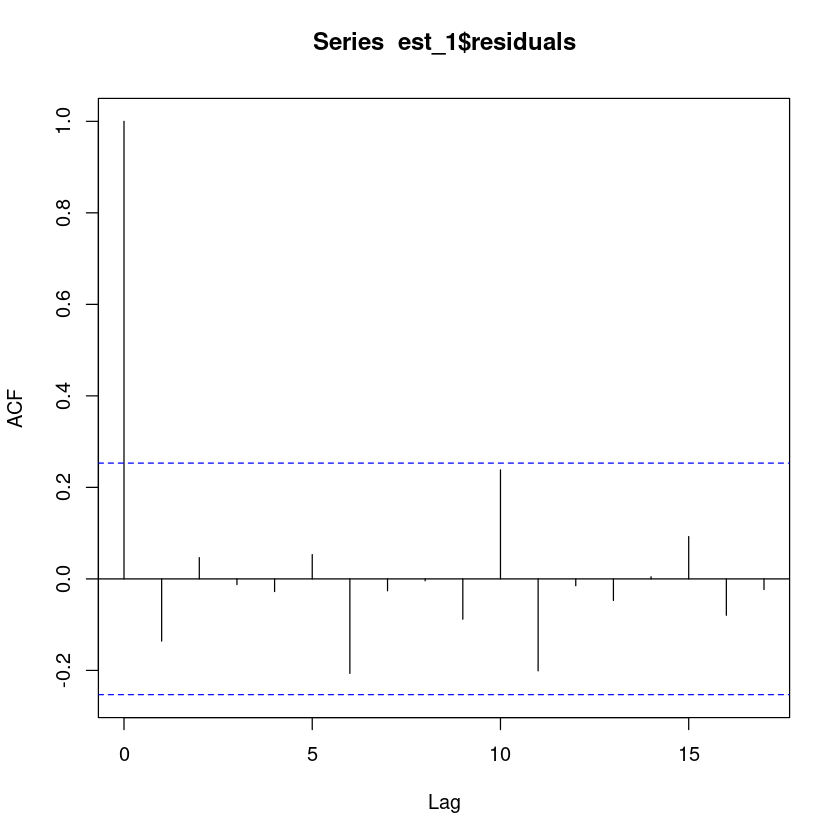

In [11]:
acf(est_1$residuals)

None of the values of the ACF cross the significance threshold. Of course, we should
not blindly yield to a significance threshold to assess or reject significance, but this
observation is a helpful data point in a model that we already believe reasonable for
other reasons.

We do not see a pattern of self-correlation here among the residuals (i.e., the error
terms). If we had seen such a pattern, we would likely want to return to our original
model and consider including additional terms to add complexity to account for the
significant autocorrelation of the residuals.

Another test that is commonly performed is the Ljung-Box test, an overall test of the
randomness of a time series. More formally it poses the following null and alternate
hypotheses:
- H0: The data does not exhibit serial correlation.
- H1: The data does exhibit serial correlation.

This test is commonly applied to AR (and more generally, ARIMA) models, and
more specifically to the residuals from the model fit rather than to the model itself:

In [12]:
Box.test(est_1$residuals, lag = 10, type = 'Ljung', fitdf = 3)


	Box-Ljung test

data:  est_1$residuals
X-squared = 9.3261, df = 7, p-value = 0.2301


We apply the Ljung-Box test to our est_1 model to assess its goodness of fit. We can‐
not reject the null hypothesis that the data does not exhibit serial correlation. This is
confirmation of what we just found by plotting the ACF of the residuals.

### Forecasting with an AR(p) process

In the following sections we will illustrate how to make forecasts with AR processes.
We first explore the case of one time step ahead and then discuss how predicting
multiple steps ahead differs from the further case.

Forecasting one time step ahead. We first consider the case that we want to forecast
one time step ahead with a known (or estimated) AR model. In such a case, we
actually have all the information we need.

We plot the forecast using the fitted() function from the forecast package. Here is
the code in full; it’s quite easy to do:

In [13]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



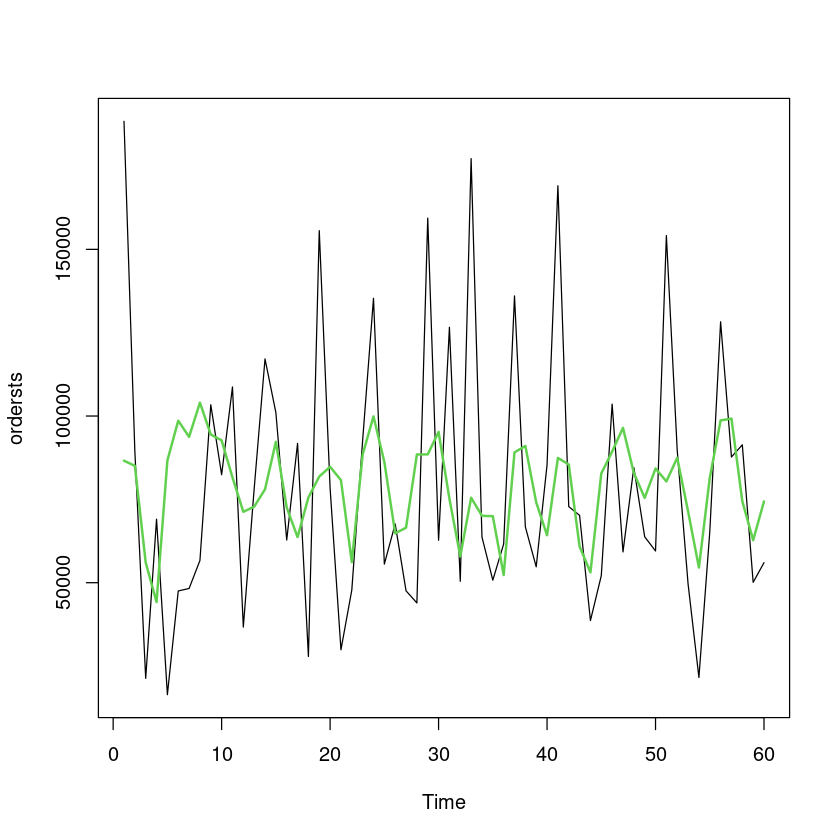

In [14]:
plot(ordersts, type = 'l')
lines(fitted(est_1), col = 3, lwd = 2)

Here we see the original time series in the solid line and the fitted time series
in the dashed line.

Now let’s think about the quality of the forecast. If we calculate the correlation
between the predicted value and the actual value, we get 0.328439242177455. This is not bad in some
contexts, but remember that sometimes differencing the data will remove what
seemed like a strong relationship and replace it with one that is essentially random.
This will be the case particularly if the data was not truly stationary when we fit it, so
that an unidentified trend masquerades as good model performance when it is
actually a trait of the data we should have addressed before modeling.

In [15]:
cor(ordersts, fitted(est_1))

[1] 0.3284392

We can difference both the series and the predicted values to see whether the change
from one time period to the next is well predicted by the model. Even after differenc‐
ing, our predictions and the data show similar patterns, suggesting our model is a
meaningful one

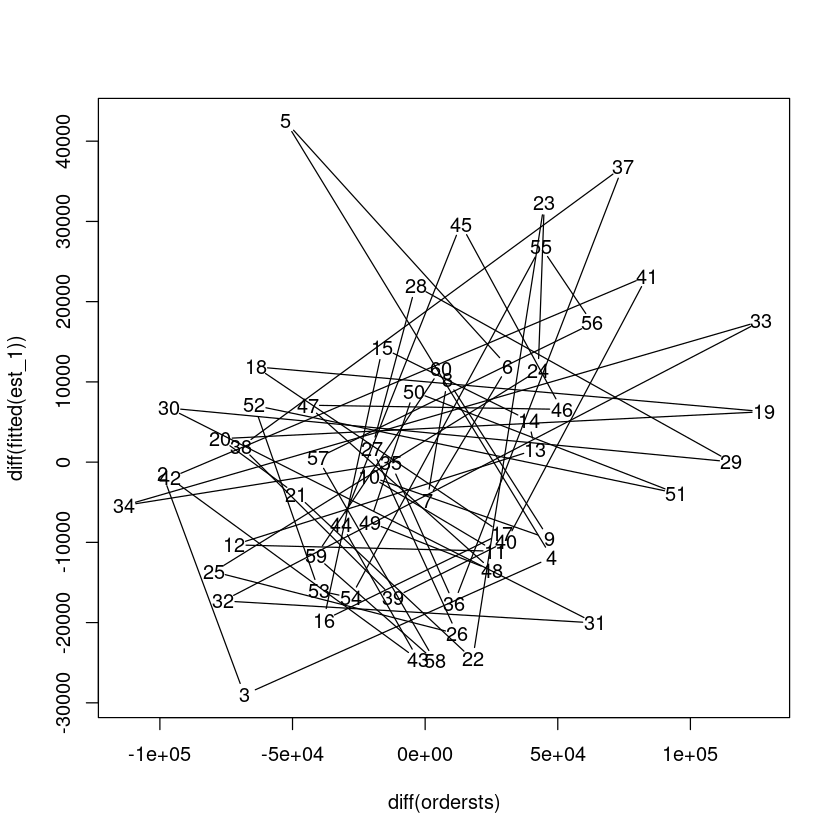

In [16]:
plot(diff(ordersts), diff(fitted(est_1)))

We can also test whether we predict the same moves at the same time, by plotting the
differenced series and looking at that correlation. This plot reveals some correlation,
which we can confirm by calculating the correlation value. The model works even for
predicting the change from one time step to the next.

Looking back at the original plot of the forecast versus actual values, we see that the
main difference between the forecast and the data is that the forecast is less variable
than the data. It may predict the direction of the future correctly, but not the scale of
the change from one time period to another. This is not a problem per se but rather
reflects the fact that forecasts are means of the predicted distributions and so neces‐
sarily will have lower variability than sampled data.

This property of statistical models is sometimes forgotten in the ease of fast visualizations that tend to suggest a more stable future than will usually be the case. When you
present visualizations, make sure to remind your audience of what is being plotted. In
this case, our forecasts suggest a much smoother future than is likely to be the case.

What we would do is first produce the one-step-ahead forecast, and then use this to
furnish the y t value we need to predict $y_{t +1}$ .
Notice that in our current model, the shift from a one-step-ahead forecast to a two-
step-ahead forecast would actually not require these gymnastics because the $y_{t - 1}$
value is not used when predicting y t . Everything we need to know to make a predic‐
tion two time steps ahead is known and there is no need to guesstimate. In fact, we
should come up with the same series of values as we did for the one-step-ahead pre‐
diction—there will be no new sources of error or variability.
If we want to predict even further, however, we will need to generate forecasted
future values as inputs into our prediction. Let’s predict $y_{t+3}$ . This will involve a model
with coefficients depending on $y_{t+1}$ and $y_t$ . So we will need to predict both of these
values—y t + 1 and y t —and then in turn use these estimated values in the prediction for
$y_{t+3}$ . As before, we can use the fitted() function for the forecast package to do this
—it’s no more difficult codewise than the one-step-ahead forecast

In [17]:
fitted(est_1, h = 3)

A Time Series:
 [1]        NA        NA        NA  45068.26  79995.80 103142.74  80892.15
 [8]  94666.67  86121.80  84016.70  83223.69  69388.38  77780.20  71690.39
[15]  93239.98  79719.12  65295.40  73780.52  86998.24  76037.14  94257.81
[22]  55003.70  79151.48  98353.57  87008.64  71305.51  60889.81  88977.87
[29]  85022.24  87078.82  88175.41  51949.21  84911.04  68709.61  88584.61
[36]  51143.74  85577.65  92729.36  82711.52  59792.97  83892.46  89329.90
[43]  75805.68  50794.57  84473.59  86695.31  90825.70  85539.27  68643.69
[50]  84555.00  78247.54  82934.49  84936.18  54956.70  77425.29  92659.24
[57]  96247.63  79859.58  60647.62  77478.22

In [18]:
var(fitted(est_1, h = 3), na.rm = TRUE)

[1] 174870141

In [19]:
var(fitted(est_1, h = 5), na.rm = TRUE)

[1] 32323722

In [29]:
var(fitted(est_1, h = 10), na.rm = TRUE)

[1] 1013396

In [21]:
var(fitted(est_1, h = 20), na.rm = TRUE)

[1] 1176.689

In [22]:
var(fitted(est_1, h = 30), na.rm = TRUE)

[1] 3.388713

Forecasts for sufficiently far out in the future will merely predict the mean of the pro‐
cess, which makes sense. At some point in the distant future, our current data does
not give us specific sensible information relevant to the future, and so our forecast
increasingly reverts to the baseline properties known about the process, such as its
mean.

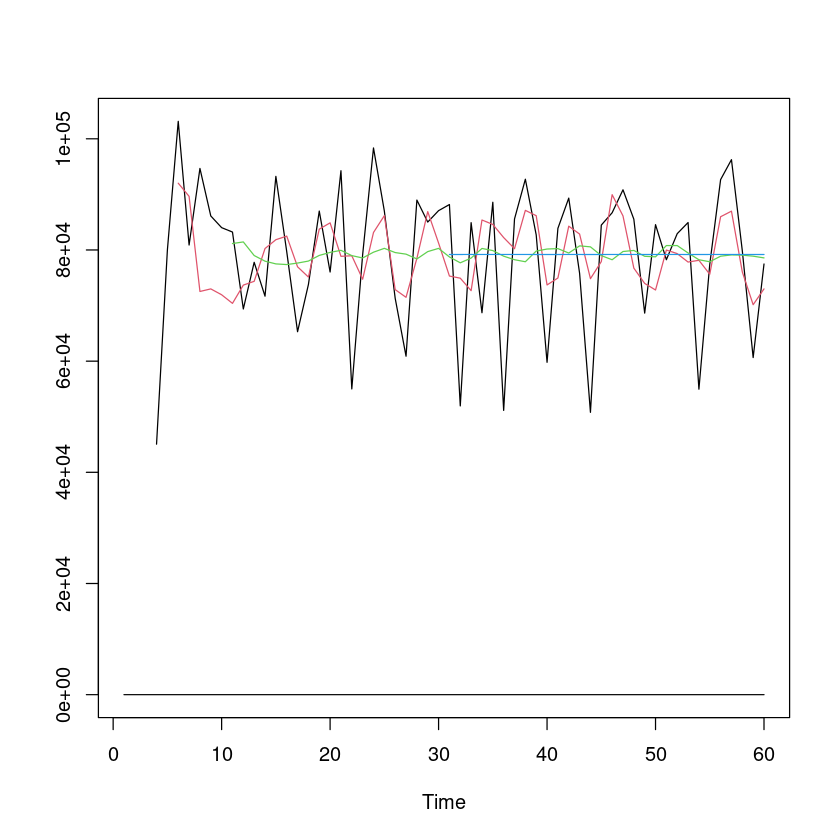

In [23]:
ts.plot(fitted(est_1, h = 3), fitted(est_1, h = 5), fitted(est_1, h = 10), fitted(est_1, h = 30), col = c(1, 2, 3, 4), label_both = TRUE)

Plots of predictions into the future. The values spanned by the y-axis
increasingly narrow as we predict further into the future and the model more closely
appears to provide a constant prediction of the mean value of the process. The horizons
predicted increase from top to bottom and are 3, 10, and 30 time steps, respectively.

The important point to remember from this is that AR (as well as MA, ARMA, and
ARIMA) models are best for making short-term pre‐
dictions. These models lose predictive power for large future horizons.

## Moving Average Models

A moving average (MA) model relies on a picture of a process in which the value at
each point in time is a function of the recent past value “error” terms, each of which
is independent from the others. We will review this model in the same series of steps
we used to study AR models.

A moving average model can be expressed similarly to an autoregressive model
except that the terms included in the linear equation refer to present and past error
terms rather than present and past values of the process itself.

Economists talk about these error terms as “shocks” to the system, while someone
with an electrical engineering background could talk about this as a series of impulses
and the model itself as a finite impulse response filter, meaning that the effects of any
particular impulse remain only for a finite period of time.

MA models are by definition weakly stationary without the need to impose any con‐
straints on their parameters. This is because the mean and variance of an MA process
are both finite and invariant with time because the error terms are assumed to be iid
with mean 0.

We fit an MA model to the same data used fit to AR model, and we can use the ACF
to determine the order of the MA process

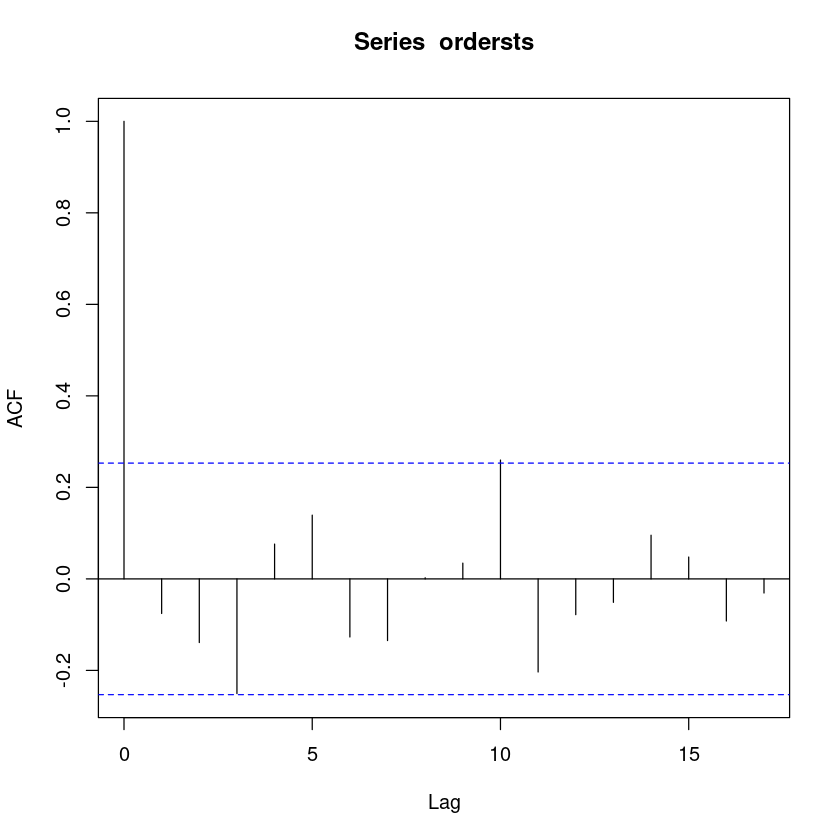

In [24]:
acf(ordersts)

Unlike an autoregressive process, which has a slowly decaying
ACF, the definition of the MA process ensures a sharp cutoff of the
ACF for any value greater than q, the order of the MA process.
This is because an autoregressive process depends on previous
terms, and they incorporate previous impulses to the system,
whereas an MA model, incorporating the impulses directly
through their value, has a mechanism to stop the impulse propaga‐
tion from progressing indefinitely.

We see significant values at lags 3 and 9, so we fit an MA model with these lags. We
need to be careful that we don’t accidentally constrain the wrong coefficients to 0 in
the model, which we can confirm by printing the display:

In [25]:
ma_test <- arima(x = ordersts,
                 order = c(0, 0, 9),
                 fixed = c(0, 0, NA, rep(0, 5), NA, NA))

In [26]:
ma_test


Call:
arima(x = ordersts, order = c(0, 0, 9), fixed = c(0, 0, NA, rep(0, 5), NA, NA))

Coefficients:
      ma1  ma2      ma3  ma4  ma5  ma6  ma7  ma8      ma9  intercept
        0    0  -0.4725    0    0    0    0    0  -0.0120  79689.809
s.e.    0    0   0.1459    0    0    0    0    0   0.1444   2674.593

sigma^2 estimated as 1.4e+09:  log likelihood = -717.31,  aic = 1442.61

We should also check our fit, as we did for the AR model, by plotting the ACF of the
residuals of the model and, as a second, separate test of model performance, running
the Ljung-Box test to check for overall randomness in any fit to the residuals. Note
that the Box.test() input requires us to specify the number of degrees of freedom—
that is, how many model parameters were free to be estimated rather than being con‐
strained to a specific value. In this case, the free parameters were the intercept as well
as the MA3 and MA9 terms:

In [27]:
Box.test(ma_test$residuals, lag = 10, type = 'Ljung', fitdf = 3)


	Box-Ljung test

data:  ma_test$residuals
X-squared = 7.6516, df = 7, p-value = 0.3643


We cannot reject the null hypothesis that there is no temporal correlation between
residual points.

Likewise, a plot of the ACF of the residuals suggests no temporal correlation

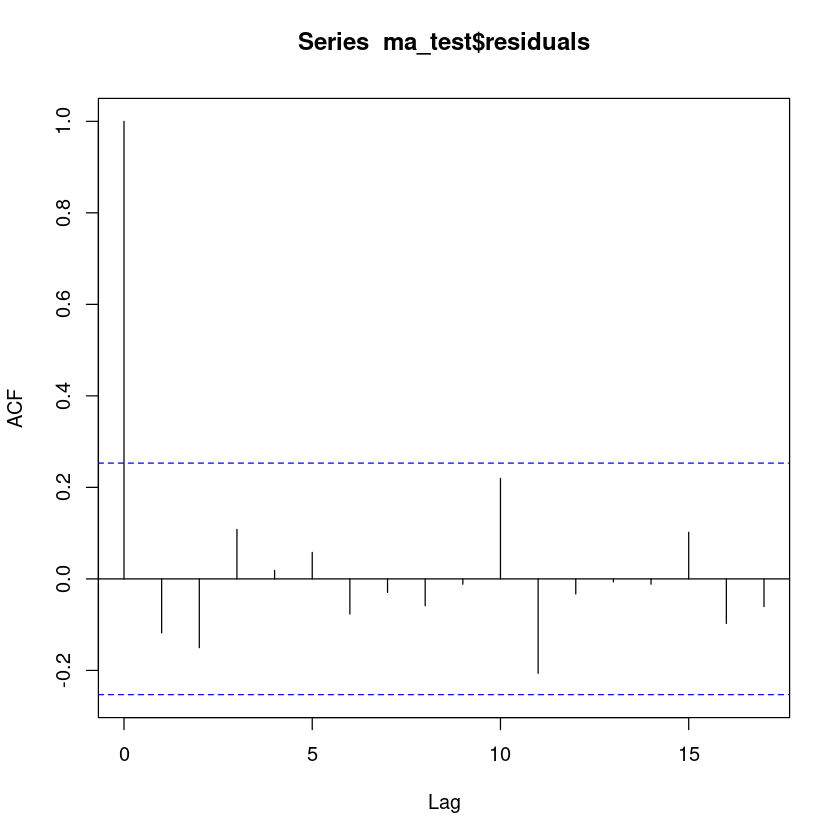

In [28]:
acf(ma_test$residuals)

## Forecasting an MA(q) process

In [30]:
fitted(ma_test, h = 1)

A Time Series:
 [1]  90116.64  80626.91  74090.45  38321.61  74734.77 101153.20  65930.90
 [8] 106351.80 104138.05  86938.99 102868.16  80502.02  81466.01  77619.15
[15] 100984.93  81463.10  61622.54  79660.81  88563.91  65370.99 104679.89
[22]  48047.39  73070.29 115034.16  80034.03  70052.29  70728.85  90437.86
[29]  80684.44  91533.59 101668.18  42273.27  93055.40  68187.65  75863.50
[36]  40195.15  82368.91  90605.60  69924.83  54032.55  90866.20  85839.41
[43]  64932.70  43030.64  85575.32  76561.14  82047.95  95683.35  66553.13
[50]  89532.20  85102.64  80937.97  93926.74  47468.84  75223.67 100887.60
[57]  92059.32  84459.85  67112.16  80917.23

MA models exhibit strong mean reversion and so forecasts rapidly converge to the
mean of the process. This makes sense given that the process is considered to be a
function of white noise.
If you forecast beyond the range of the model established by its order, the forecast
will necessarily be the mean of the process by definition of the process.

Consider an
MA(1) model:

$$ y_t = \mu + \theta_1 e_{t - 1} + e_t$$

To predict one time step in the future, our estimate for $ y_{t + 1} $ is

$$ \mu + \theta_1 y_t + e_t $$

Ifwe wanto to predict two time steps in the future, our estimate is:

$$ E(y_{t + 2} = \mu + e_{t + 2} + \theta e_{t+1}) = \mu + 0 + \theta_1 \cdot 0 = \mu $$

With an MA(1) process we cannot offer an informed prediction beyond one step
ahead, and for an MA(q) process in general we cannot offer a more informed predic‐
tion beyond q steps than the mean value emitted by the process. By informed predic‐
tion, I mean one in which our most recent measurements have an impact on the
forecas

We can see this by producing predictions with our MA(9) model that we just fit, and
for which we now seek predictions 10 time steps ahead:

In [32]:
fitted(ma_test, h =10)

A Time Series:
 [1]       NA       NA       NA       NA       NA       NA       NA       NA
 [9]       NA       NA 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81
[17] 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81
[25] 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81
[33] 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81
[41] 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81
[49] 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81
[57] 79689.81 79689.81 79689.81 79689.81

# Autoregressive Integrated Moving Average Models

Now we that we have examined AR and MA models individually, we look to the
Autoregressive Integrated Moving Average (ARIMA) model, which combines these,
recognizing that the same time series can have both underlying AR and MA model
dynamics. This alone would lead us to an ARMA model, but we extend to the
ARIMA model, which accounts for differencing, a way of removing trends and rendering a time series stationary.

## What is differencing?
As discussed earlier in the book, differencing is converting a time series of values into
a time series of changes in values over time. Most often this is done by calculating
pairwise differences of adjacent points in time, so that the value of the differenced
series at a time t is the value at time t minus the value at time t – 1. However, differ‐
encing can also be performed on different lag windows, as convenient.

ARIMA models continue to deliver near state-of-the-art performance, particularly in
cases of small data sets where more sophisticated machine learning or deep learning
models are not at their best. However, even ARIMA models pose the danger of overfitting despite their relative simplicity.

The stationarity of the ARMA process comes down to the stationarity of its AR com‐
ponent and is controlled by the same characteristic equation that controls whether an
AR model is stationary.
From an ARMA model, it is a simple transition to an ARIMA model. The difference
between an ARMA model and an ARIMA model is that the ARIMA model includes
the term integrated, which refers to how many times the modeled time series must be
differenced to produce stationarity.

Importantly, the order of differencing should not be too great. In general, the value of
each parameter of an ARIMA(p, d, q) model should be kept as small as possible to
avoid unwarranted complexity and overfitting to the sample data. As a not-at-all-
universal rule of thumb, you should be quite skeptical of values of d over 2 and values
of p and q over 5 or so. Also, you should expect either the p or q term to dominate
and the other to be relatively small. These are practitioner notes gathered from ana‐
lysts and not hard-and-fast mathematical truths.

## Selecting parameters
The ARIMA model is specified in terms of the parameters (p, d, q). We select the val‐
ues of p, d, and q that are appropriate given the data we have.
Here are some well-known examples from the Wikipedia description of ARIMA
models:

- ARIMA(0, 0, 0) is a white noise model
- ARIMA(0, 1, 0) is a random walk, and ARIMA(0, 1, 0) with a nonzero constant
    is a random walk with drift.
- ARIMA(0, 1, 1) is an exponential smoothing model, and an ARIMA(0, 2, 2) is
    the same as Holt's linear method, which extends exponential smoothing
    to data with a trend, so that it can be used to forecast data with an underlying trend.

We choose the order of our model based on a combination of domain knowledge,
various fitting evaluation metrics (such as the AIC), and general knowledge of how
he PACF and ACF should appear for a given underlying process.

### Manually fitting a model
There are heuristics for choosing the parameters of an
ARIMA model, where parsimony is paramount. One popular and longstanding
method is the __Box-Jenkins method__, which is an iterative multistep process:
1. Use you data, visualizations and underlying knowledge to select a class of
    model appropriate to your data
2. Estimate the parameters given your training data
3. Evaluate the performance of your model based on your training data and
    tweak the parameters of the model to address the weakness you see in the
    performance diagnostics.

In [36]:
library(forecast)
set.seed(1017)

In [37]:
# lets pretend we do not know the coefficients of ar and ma
y = arima.sim(n = 1000, list(ar = c(0.8, -0.4), ma = c(-0.7)))


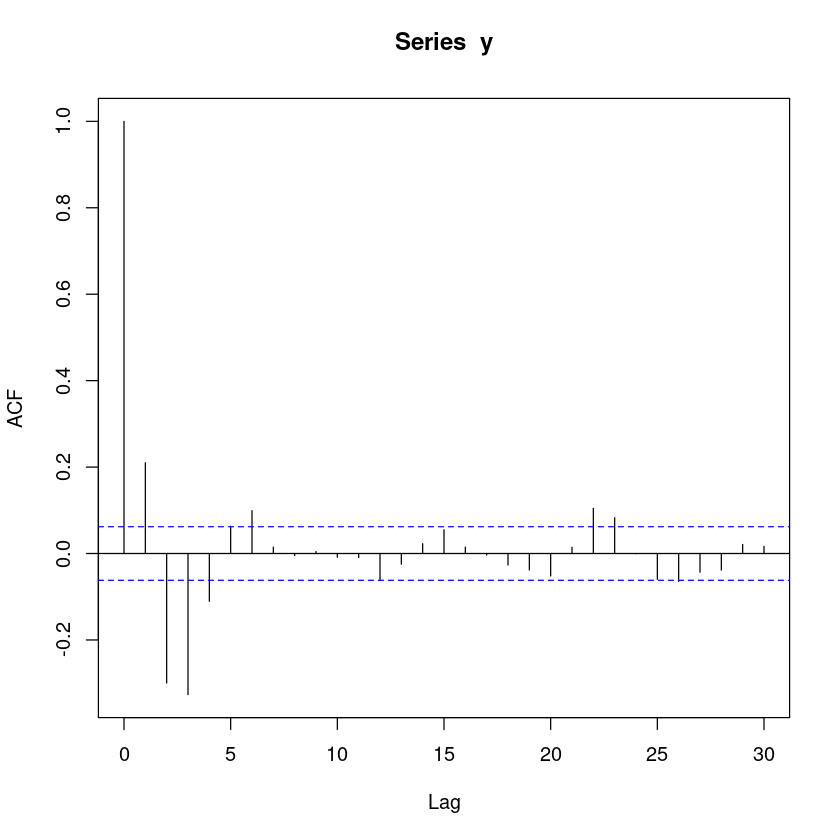

In [38]:
acf(y)

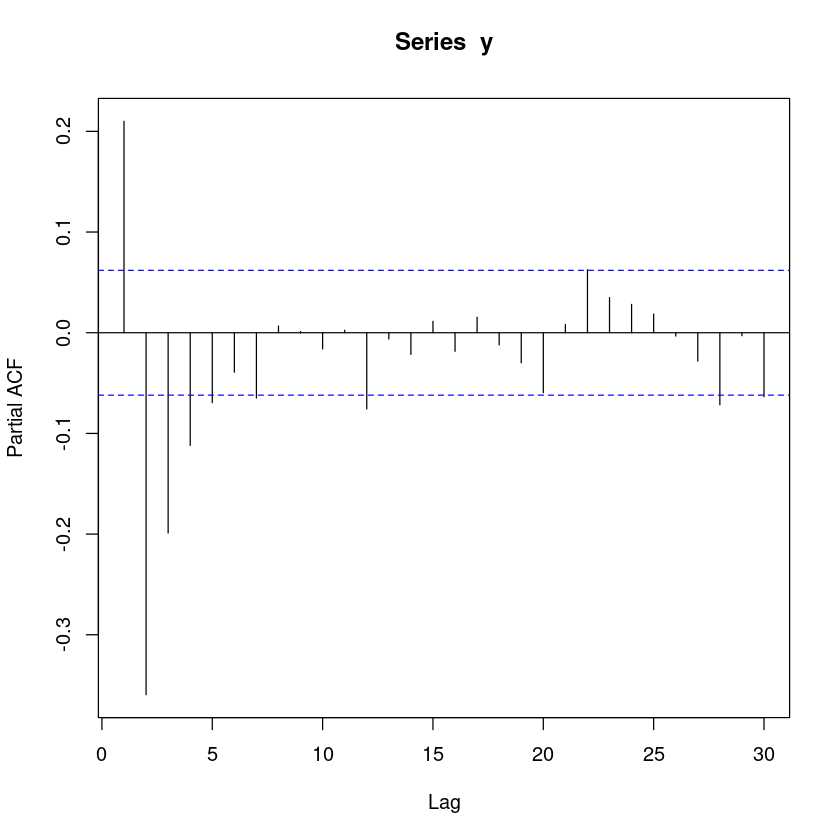

In [39]:
pacf(y)